# Exploring the joined datasets:

This datasets has information from Census, Crimes and Housing dataset.
The previous steps to join this datasets can be seen in other folders

# RESEARCH QUESTIONS


### Joining different datasets, we can better understand the sentences ?

### Are sensible features of the two datasets correlated (race, gender and county) ? Are this related with some index of the other base ?


In [14]:
import statistics

import geopandas

import seaborn as sns
import pandas as pd
import numpy as np

from shapely.geometry import Point
import matplotlib.pyplot as plt

In [15]:
def count_instances(df, feature):
    keys = set(df[feature])
    values = {}
    for key in keys:
        values[key] = len(df[df[feature] == key])
    
    return values

In [16]:
df = pd.read_table("Input/joined_dataset.csv", sep = ',')

In [17]:
pd.set_option('display.max_columns', 500)
df.head(5)

,Borough,Latitude,Longitude,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,Mean Bathrooms,County,Event Date Crimes,Event Ending Date Crimes,Event Report Date Crimes,Description Crimes,Attempt Complete Crimes,Level of Offense Crimes,Borough Crimes,Latitude Crimes,Longitude Crimes,Crimes Distance,BlockCode Census,Latitude Census,Longitude Census,County Census,Borough Census,TotalPop Census,Men Census,Women Census,Hispanic Census,White Census,Black Census,Native Census,Asian Census,Citizen Census,Income Census,IncomeErr Census,IncomePerCap Census,IncomePerCapErr Census,Poverty Census,ChildPoverty Census,Professional Census,Service Census,Office Census,Construction Census,Production Census,Drive Census,Carpool Census,Transit Census,Walk Census,OtherTransp Census,WorkAtHome Census,MeanCommute Census,Employed Census,PrivateWork Census,PublicWork Census,SelfEmployed Census,FamilyWork Census,Unemployment Census,Census Distance
0,MANHATTAN,40.811202,-73.942995,0,16,24,0,38,1,16,1.354430,NEW YORK,11/18/2015,11/18/2015,11/18/2015,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,40.811287,-73.943007,0.009531,3.606102e+10,40.809020,-73.941256,NEW YORK,MANHATTAN,5320.0,2758.0,2562.0,11.9,21.8,53.3,0.0,7.2,3683.0,42220.0,8831.0,37019.0,7619.0,25.6,50.1,42.3,13.7,30.4,3.5,10.1,8.8,2.1,70.8,7.1,4.9,6.3,36.4,2695.0,78.7,11.1,10.2,0.0,11.0,0.283419
1,MANHATTAN,40.833829,-73.941339,20,3,1,0,0,1,0,2.600000,NEW YORK,12/23/2015,12/23/2015,12/23/2015,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,40.833810,-73.941347,0.002280,3.606102e+10,40.832764,-73.941256,NEW YORK,MANHATTAN,2810.0,1253.0,1557.0,49.1,7.7,38.5,0.0,1.3,1914.0,41036.0,12263.0,23321.0,3991.0,22.6,30.8,42.3,28.7,18.2,1.6,9.2,17.5,4.9,64.1,5.2,4.7,3.6,42.8,1426.0,73.4,17.3,9.3,0.0,14.0,0.118684
2,MANHATTAN,40.835160,-73.941663,6,11,3,0,0,0,0,2.000000,NEW YORK,12/30/2015,12/30/2015,12/30/2015,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,40.835319,-73.942040,0.036341,3.606102e+10,40.836156,-73.941256,NEW YORK,MANHATTAN,16231.0,8315.0,7916.0,82.7,5.4,7.4,0.0,1.5,9202.0,35394.0,3870.0,15173.0,1608.0,30.8,40.8,23.3,38.0,22.6,5.8,10.3,7.4,4.9,64.3,16.0,1.2,6.2,37.0,7633.0,84.7,7.0,8.0,0.3,10.3,0.115928
3,MANHATTAN,40.835295,-73.941977,4,14,2,0,0,0,0,2.000000,NEW YORK,12/30/2015,12/30/2015,12/30/2015,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,40.835319,-73.942040,0.005952,3.606102e+10,40.836156,-73.941256,NEW YORK,MANHATTAN,16231.0,8315.0,7916.0,82.7,5.4,7.4,0.0,1.5,9202.0,35394.0,3870.0,15173.0,1608.0,30.8,40.8,23.3,38.0,22.6,5.8,10.3,7.4,4.9,64.3,16.0,1.2,6.2,37.0,7633.0,84.7,7.0,8.0,0.3,10.3,0.113339
4,BROOKLYN,40.708637,-73.948486,59,7,4,0,0,1,0,2.197183,KINGS,11/30/2015,11/30/2015,11/30/2015,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,BROOKLYN,40.708669,-73.948480,0.003622,3.604705e+10,40.707261,-73.947588,KINGS,BROOKLYN,3798.0,1774.0,2024.0,41.8,34.9,6.7,0.0,15.9,2732.0,31047.0,10042.0,26421.0,3750.0,29.2,56.7,37.0,28.7,26.2,3.8,4.3,7.9,0.0,80.1,5.3,4.2,2.6,40.8,1963.0,85.5,8.0,6.5,0.0,8.4,0.170729


### Calculating the amount of crimes per latitude and Longitude

In [18]:
amount_crimes = df.groupby(['Latitude', 'Longitude'], as_index = False)['Description Crimes'].count()

In [19]:
description = dict(enumerate(df["Description Crimes"].astype('category').cat.categories))
df_original = df.copy()
categorize = ['Description Crimes']
for cat in categorize:
    df[cat] = df[cat].astype("category").cat.codes

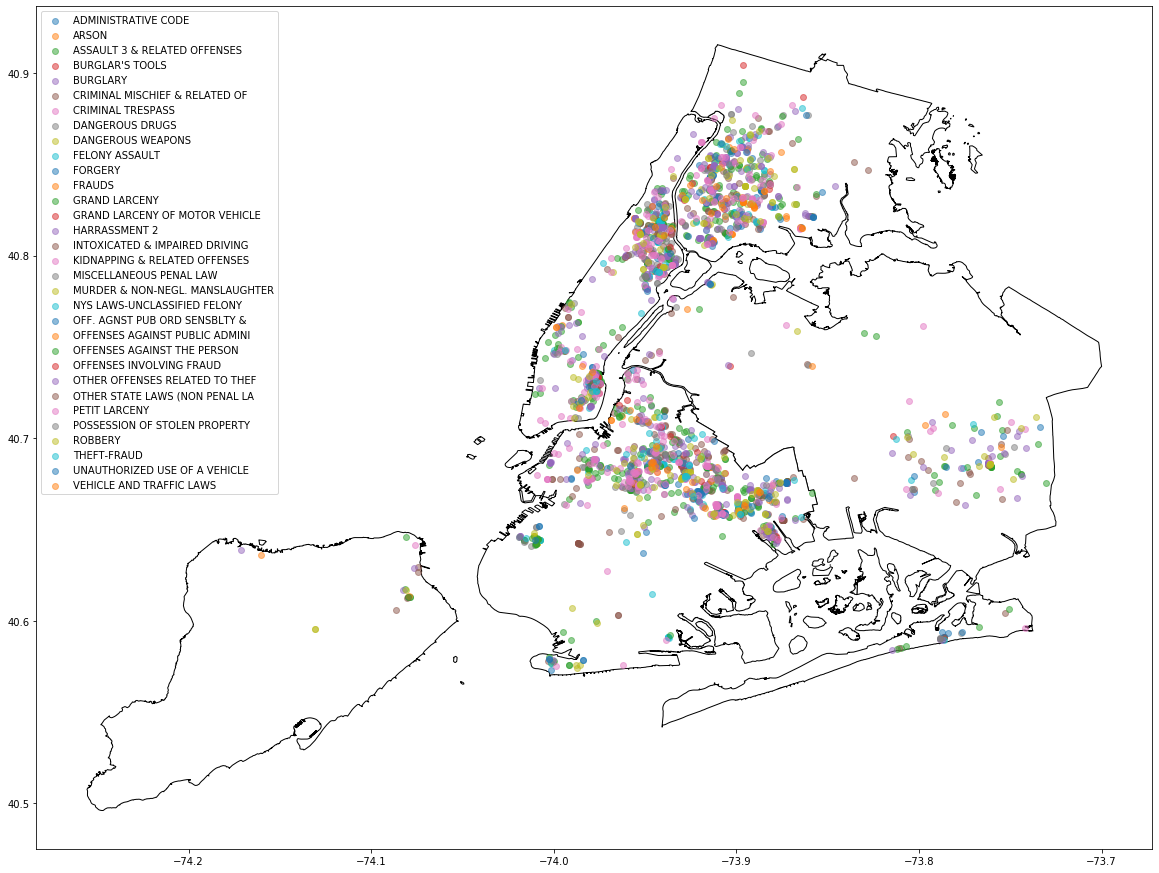

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
world = geopandas.read_file(geopandas.datasets.get_path("nybb")) # open new york city map
world.to_crs({"init": "epsg:4326"}).plot(ax=ax, color="white", edgecolor="black")


for index, cat in enumerate(set(df['Description Crimes'])):
    df_temp = df[df['Description Crimes'] == cat]
    x = df_temp['Longitude']
    y = df_temp['Latitude']
    
    geometry = [Point(xy) for xy in zip(x, y)]        
    geo_df = geopandas.GeoDataFrame(df_temp, geometry=geometry)

    plt.scatter(x, y, alpha=0.5, label = description[index])

    # Fazer um subplot com crimes separadamente
plt.legend()

### Categorizing Crimes

In [21]:
description = {'ADMINISTRATIVE CODE': 'E', 'ARSON': 'B', 'ASSAULT 3 & RELATED OFFENSES': 'B',
               "BURGLAR'S TOOLS": 'D', 'BURGLARY': 'B', 'CRIMINAL MISCHIEF & RELATED OF': 'C',
               'CRIMINAL TRESPASS': 'D', 'DANGEROUS DRUGS': 'D', 'DANGEROUS WEAPONS': 'C',
               'FELONY ASSAULT': 'A', 'FORGERY': 'C', 'FRAUDS': 'D', 'GRAND LARCENY': 'B',
               'GRAND LARCENY OF MOTOR VEHICLE': 'B', 'HARRASSMENT 2': 'C',
               'INTOXICATED & IMPAIRED DRIVING': 'E', 'KIDNAPPING & RELATED OFFENSES': 'B',
               'MISCELLANEOUS PENAL LAW': 'C', 'MURDER & NON-NEGL. MANSLAUGHTER': 'A',
               'NYS LAWS-UNCLASSIFIED FELONY': 'A', 'OFF. AGNST PUB ORD SENSBLTY &': 'E',
               'OFFENSES AGAINST PUBLIC ADMINI': 'E', 'OFFENSES AGAINST THE PERSON': 'E',
               'OFFENSES INVOLVING FRAUD': 'D', 'OTHER OFFENSES RELATED TO THEF': 'D',
               'OTHER STATE LAWS (NON PENAL LA': 'E', 'PETIT LARCENY': 'D',
               'POSSESSION OF STOLEN PROPERTY': 'E', 'ROBBERY': 'B', 'THEFT-FRAUD': 'D',
               'UNAUTHORIZED USE OF A VEHICLE': 'E', 'VEHICLE AND TRAFFIC LAWS': 'E'}

In [22]:
crimes = set(df_original['Description Crimes'])
df_original['CRIME CLASS'] = 'E'
for crime in crimes:
    for index, _ in df_original[df_original['Description Crimes'] == crime].iterrows():
        df_original.loc[index, 'CRIME CLASS'] = description[crime]

{'A': 38, 'C': 154, 'B': 190, 'E': 49, 'D': 143, 'County': 'NEW YORK'}
{'A': 43, 'C': 182, 'B': 151, 'E': 70, 'D': 123, 'County': 'BRONX'}
{'A': 5, 'C': 73, 'B': 52, 'E': 16, 'D': 23, 'County': 'QUEENS'}
{'A': 57, 'C': 342, 'B': 332, 'E': 109, 'D': 228, 'County': 'KINGS'}
{'E': 4, 'D': 1, 'C': 8, 'B': 7, 'A': 0, 'County': 'RICHMOND'}


(0.0, 1.0, 0.0, 1.0)

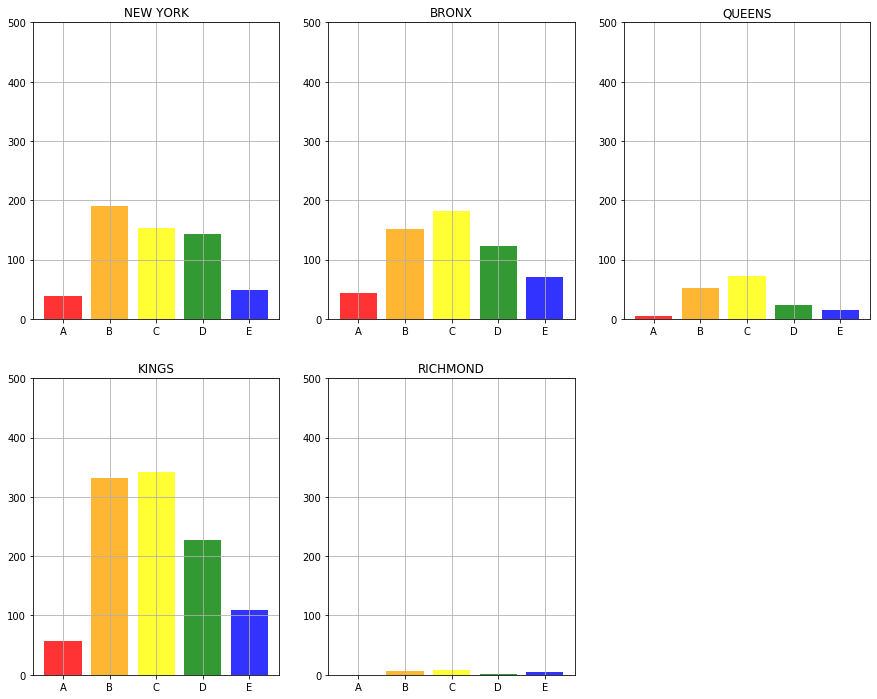

In [23]:
counties = set(df['County'])
counties_info = []
index = np.arange(len(set(df_original['CRIME CLASS'])))

values_keys = ['A', 'B', 'C', 'D', 'E']
for county in counties:
    
    df_aux = df_original[df_original['County'] == county]
    county_crimes = count_instances(df_aux, 'CRIME CLASS')
    for key in values_keys:
        if key not in county_crimes:
            county_crimes[key] = 0
    county_crimes['County'] = county
    
    counties_info.append(county_crimes)


fig, axes = plt.subplots(figsize=(15,12),nrows=2, ncols=3)

columns = {0: [0,0], 1: [0,1], 2: [0,2], 3: [1,0], 4: [1, 1]}
colors = ['red', 'orange', 'yellow', 'green', 'blue']
# Transforming dict in dataframe

flag = True
for idx, county in enumerate(counties_info):
    print(county)
    county_name = county['County']

    values = list(county.values())
    keys = list(county.keys())

    keys, values = zip(*sorted(zip(keys, values)))
    keys, values = list(keys), list(values)
    values = list(filter(lambda x: county_name != x, values))
    keys = list(filter(lambda x: 'County' != x, keys))

    if flag:
        axes[columns[idx][0], columns[idx][1]].bar(index, values, color = colors, alpha = 0.8)
    else:
        axes[columns[idx][0], columns[idx][1]].bar(index, values,
                                                   color = colors, alpha = 0.8, sharex=axes[0, 0])
    #axes.set_ylim([ymin,ymax])
    axes[columns[idx][0], columns[idx][1]].title.set_text(county_name)
    axes[columns[idx][0], columns[idx][1]].grid(True)
    axes[columns[idx][0], columns[idx][1]].set_xticklabels([0] + keys)
    axes[columns[idx][0], columns[idx][1]].set_ylim(0, 500) # was manually setted
    
axes[1][2].axis('off')

In [43]:
counties = set(df_original['County'])

columns = ['Asian Census', 'Native Census', 'Black Census', 'White Census', 'IncomePerCap Census']
# Poverty Census, 
for county in counties:
    print(county)
    df_aux = df_original[df_original['County'] == county]
    print(count_instances(df_aux, 'Level of Offense Crimes'))
    #for column in columns:
    #    print(df_aux.describe()[column])
    #print(df_aux.describe()['IncomePerCap Census']['mean'])

NEW YORK
{'FELONY': 196, 'VIOLATION': 79, 'MISDEMEANOR': 299}
BRONX
{'MISDEMEANOR': 310, 'VIOLATION': 81, 'FELONY': 178}
QUEENS
{'MISDEMEANOR': 79, 'VIOLATION': 28, 'FELONY': 62}
KINGS
{'MISDEMEANOR': 526, 'VIOLATION': 130, 'FELONY': 412}
RICHMOND
{'MISDEMEANOR': 13, 'VIOLATION': 3, 'FELONY': 4}


In [41]:
df.columns

Index(['Borough', 'Latitude', 'Longitude', 'Extremely Low Income Units',
       'Very Low Income Units', 'Low Income Units', 'Moderate Income Units',
       'Middle Income Units', 'Other Income Units', 'Studio Units',
       'Mean Bathrooms', 'County', 'Event Date Crimes',
       'Event Ending Date Crimes', 'Event Report Date Crimes',
       'Description Crimes', 'Attempt Complete Crimes',
       'Level of Offense Crimes', 'Borough Crimes', 'Latitude Crimes',
       'Longitude Crimes', 'Crimes Distance', 'BlockCode Census',
       'Latitude Census', 'Longitude Census', 'County Census',
       'Borough Census', 'TotalPop Census', 'Men Census', 'Women Census',
       'Hispanic Census', 'White Census', 'Black Census', 'Native Census',
       'Asian Census', 'Citizen Census', 'Income Census', 'IncomeErr Census',
       'IncomePerCap Census', 'IncomePerCapErr Census', 'Poverty Census',
       'ChildPoverty Census', 'Professional Census', 'Service Census',
       'Office Census', 'Constructi